In [1]:
import sys
sys.path.append("/home/vblot/multiaccurate_cp")
sys.path.append("/home/vblot/multiaccurate_cp/multiaccurate_cp")

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from multiaccurate_cp.domain.model.data_generator import ResidualDataset

%load_ext autoreload
%autoreload 2


/home/vblot/multiaccurate_cp/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
ds = ResidualDataset(
    images_dir="/home/vblot/multiaccurate_cp/data/polyp/02_prepared_data/res/images",
    labels_dir="/home/vblot/multiaccurate_cp/data/polyp/02_prepared_data/res/labels",
    pred_probas_dir="/home/vblot/multiaccurate_cp/data/polyp/04_predictions/res/pred_probas",
    target_recall=.9,
    return_img_path=True,
    model_input="image_and_probas"
)

1450it [00:00, 75032.27it/s]


In [17]:
import torch.utils.data as data
import torch
seed = torch.Generator().manual_seed(42)

train_set, valid_set = data.random_split(ds, [1000, 450], generator=seed)


In [18]:
len(train_set), len(valid_set)

(1000, 450)

In [19]:
recalls = []
ths = []
for (img, th), img_path in tqdm(train_set):
    label = cv2.imread(img_path.replace("images", "labels"), cv2.IMREAD_GRAYSCALE)
    label = label / 255
    pred_th = img.numpy()[3] >= th
    recall = np.sum(label * pred_th) / np.sum(label)
    recalls.append(recall)
    ths.append(th)



  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:14<00:00, 69.72it/s]


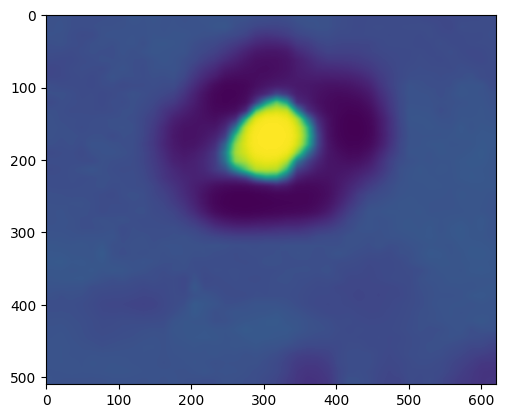

In [20]:
plt.imshow(img.numpy()[3])

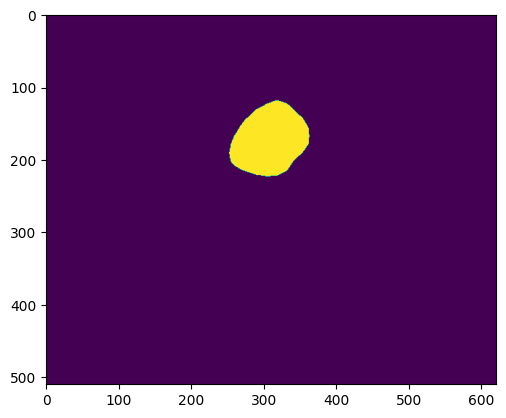

In [21]:
plt.imshow(pred_th)

In [22]:
th

0.6214843750000004

(array([ 38455.,  32422., 234917.,    997.,    791.,    766.,    791.,
           940.,   1468.,   5163.]),
 array([0.01486521, 0.11315875, 0.21145228, 0.30974582, 0.40803933,
        0.50633287, 0.60462642, 0.70291996, 0.80121344, 0.89950699,
        0.99780053]),
 <BarContainer object of 10 artists>)

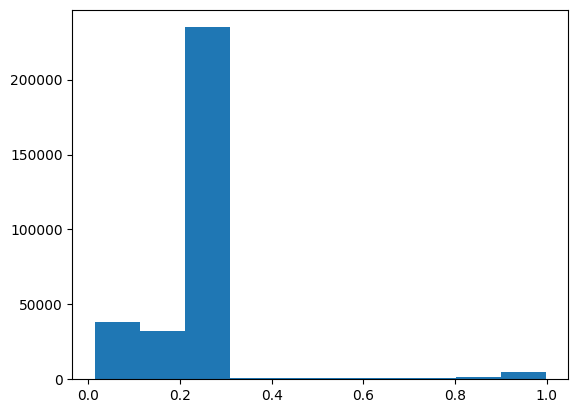

In [23]:
plt.hist(img.numpy()[3].ravel())

In [24]:
pred_th.shape, label.shape

((510, 621), (510, 621))

(array([  3.,   3.,   6., 107., 848.,  26.,   3.,   2.,   1.,   1.]),
 array([0.89912536, 0.89933   , 0.89953463, 0.89973926, 0.89994389,
        0.90014852, 0.90035315, 0.90055778, 0.90076241, 0.90096704,
        0.90117168]),
 <BarContainer object of 10 artists>)

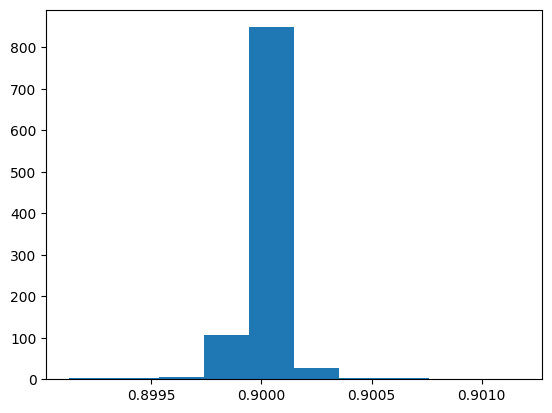

In [28]:
plt.hist(recalls)

In [26]:
ths

[0.6195312500000003,
 0.6750976562500005,
 0.7006835937500006,
 0.6320312500000003,
 0.6153320312500004,
 0.7120117187500006,
 0.56748046875,
 0.6841796875000005,
 0.6253906250000003,
 0.6216796875000004,
 0.6678710937500004,
 0.5667968750000001,
 0.48769531250000003,
 0.6318359375000002,
 0.6781250000000005,
 0.6348632812500002,
 0.7007812500000006,
 0.6924804687500005,
 0.6793945312500005,
 0.6902343750000004,
 0.5714843750000002,
 0.6253906250000003,
 0.7239257812500005,
 0.6412109375000004,
 0.5808593750000003,
 0.6541015625000004,
 0.5609375,
 0.6677734375000004,
 0.7095703125000006,
 0.6847656250000004,
 0.6199218750000004,
 0.7039062500000004,
 0.7152343750000006,
 0.7566406250000008,
 0.6498046875000003,
 0.5457031250000001,
 0.7072265625000005,
 0.7482421875000007,
 0.6880859375000004,
 0.5449218750000001,
 0.6617187500000004,
 0.7046875000000005,
 0.6515625000000004,
 0.6453125000000004,
 0.7025390625000005,
 0.5652343750000001,
 0.5789062500000002,
 0.6666992187500004,
 0.68

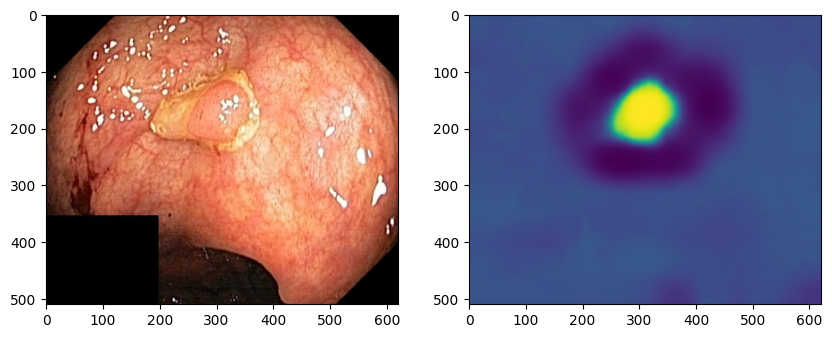

In [27]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(np.transpose(img, (1, 2, 0))[:, :, :3])
ax[1].imshow(np.transpose(img, (1, 2, 0))[:, :, 3])

# plt.imshow(np.transpose(img, (1, 2, 0))[:, :, :3])
# plt.imshow(np.transpose(img, (1, 2, 0))[:, :, 3])